In [43]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [2]:
df = pd.read_csv("archive/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<h1>VISUALIZATION</h1>

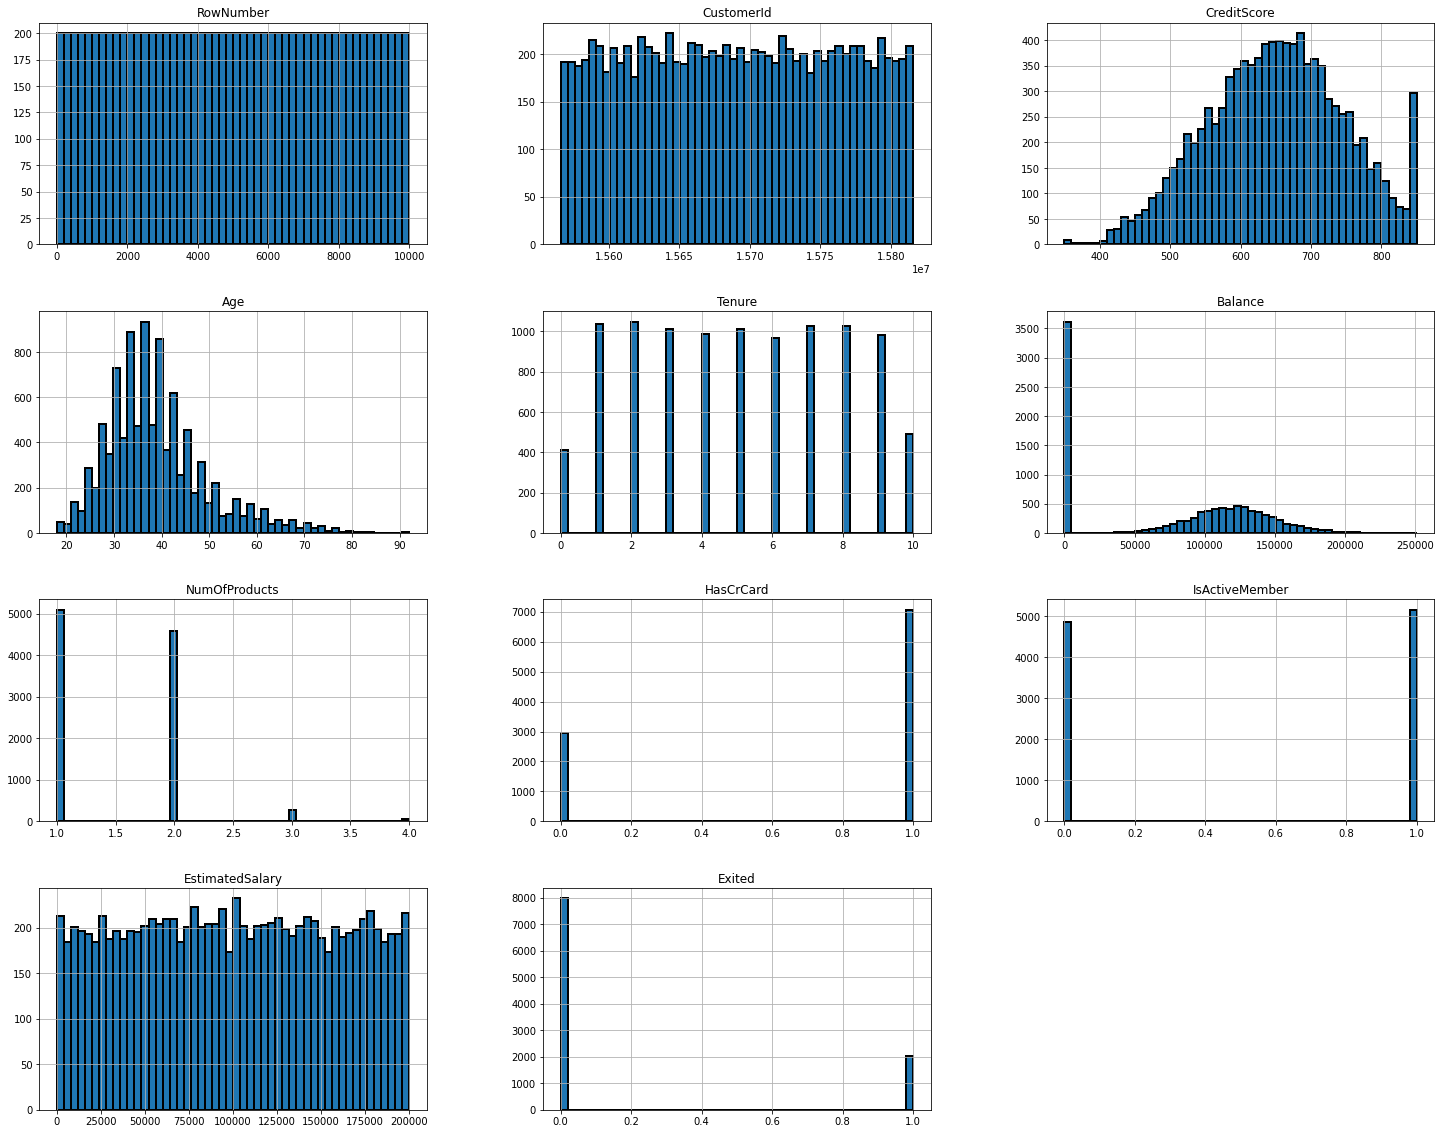

In [9]:
df.hist(bins=50, figsize=(25,20), edgecolor='black', linewidth=2)
plt.show()

In [10]:
df.drop(['Surname'],axis="columns",inplace=True)

In [11]:
df.drop(['CustomerId'],axis="columns",inplace=True)
df.drop(['RowNumber'],axis="columns",inplace=True)


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.Gender.unique()

array([0, 1])

In [14]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
dummies = pd.get_dummies(df.Geography)
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [16]:
merged = pd.concat([df,dummies], axis="columns")
merged.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [17]:
merged.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [18]:
merged.drop(['Geography'],axis="columns",inplace=True)
merged.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
cols_to_scale = ['CreditScore','Age','EstimatedSalary','Tenure','Balance','NumOfProducts']

scaler = MinMaxScaler()
merged[cols_to_scale] = scaler.fit_transform(merged[cols_to_scale])

In [20]:
input =merged.drop(['Exited'],axis="columns")
target=merged.Exited

In [21]:
X_train,X_test,Y_train,Y_test =train_test_split(input,target, test_size=0.2,random_state=1)

In [22]:
print("Train data shape: ", X_train.shape)
print("Train labels shape: ", Y_train.shape)

print("Test data shape: ", X_test.shape)
print("Test labels shape: ", Y_test.shape)

Train data shape:  (8000, 12)
Train labels shape:  (8000,)
Test data shape:  (2000, 12)
Test labels shape:  (2000,)


<h1>ARTIFICIAL NEURAL NETWORK</h1>

In [46]:
model = keras.Sequential([
    keras.layers.Dense(6,input_shape=(12,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs",histogram_freq=1)
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=100,callbacks=[tb_callback])

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7598
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7980
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8035
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8061
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8085
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8112
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8151
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4332 - accura

In [24]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8645


[0.34029003977775574, 0.8644999861717224]

<h1>TENSORBOARD</h1>

In [48]:
%tensorboard --logdir logs

Launching TensorBoard...

In [26]:
Y_predicted= model.predict(X_test)
Y_predicted[:10]

array([[0.0473949 ],
       [0.10674044],
       [0.11995608],
       [0.05351818],
       [0.13984445],
       [0.00662825],
       [0.28990796],
       [0.04206818],
       [0.4195914 ],
       [0.0355542 ]], dtype=float32)

In [27]:
Y_predicted_labels=[]
for element in Y_predicted:
    if element>0.5:
        Y_predicted_labels.append(1)
    else:
        Y_predicted_labels.append(0)


In [28]:
Y_predicted[20:30]

array([[0.31367624],
       [0.02843359],
       [0.31382853],
       [0.21870491],
       [0.12733567],
       [0.02277902],
       [0.501462  ],
       [0.25610596],
       [0.13472924],
       [0.05333191]], dtype=float32)

In [29]:
Y_predicted_labels[20:30]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [30]:
Y_test[20:30]

7673    0
2907    0
1266    0
2370    0
3092    0
130     0
1988    1
7877    1
6450    0
6880    0
Name: Exited, dtype: int64

<h1>CONFUSION MATRIX</h1>

In [31]:
cm = confusion_matrix(Y_test,Y_predicted_labels)
cm

array([[1537,   48],
       [ 223,  192]])

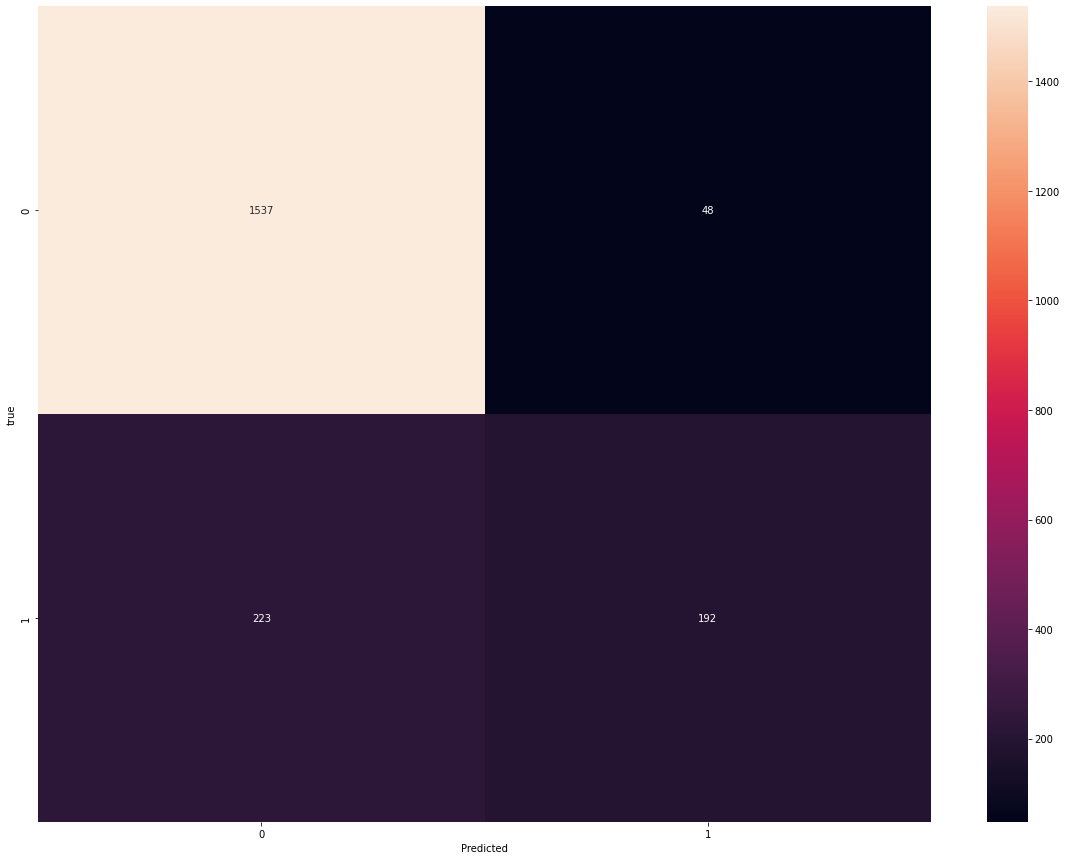

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

<h1>CLASSIFICATION REPORT</h1>


In [35]:
print(classification_report(Y_test,Y_predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.46      0.59       415

    accuracy                           0.86      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

